In [1]:
# Gdata, G2, G3

In [2]:
import igraph
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from random import shuffle
graph_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")

In [3]:
G_data = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")
G_2 = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")
G_3x = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")
G_3 = pd.read_csv("manufacturing_emails_temporal_network.csv", sep = ",")

In [4]:
G_data.head() #G_data can be used here

node1  node2  timestamp
0      1      2          1
1      1      3          1
2      1      4          1
3      1      5          1
4      1      6          1

In [5]:
from random import shuffle

In [6]:
timestamp_g2 = G_data.timestamp
timestamp_g2 = list(timestamp_g2)
shuffle(timestamp_g2)
print(timestamp_g2[0:5])

[40197, 27013, 30489, 38272, 47892]


In [7]:
for i in range(len(G_2)):
    G_2.timestamp[i]=timestamp_g2[i]

In [8]:
G_2.timestamp[0:5]

0    40197
1    27013
2    30489
3    38272
4    47892
Name: timestamp, dtype: int64

In [9]:
G_2.head() #G_2 can be used here

node1  node2  timestamp
0      1      2      40197
1      1      3      27013
2      1      4      30489
3      1      5      38272
4      1      6      47892

In [10]:
G_2 = G_2.sort_values(by=['timestamp'])
G_2.head()

node1  node2  timestamp
67489     75     89          1
55956      3     66          1
3721      35     62          1
10614     22     95          1
39615     38     72          1

In [11]:
timestamp_g3=list(G_3x.timestamp)

In [12]:
from random import seed
from random import randint
seed(1)

In [13]:
randint(0, len(G_3x)-1)

17611

In [14]:
#for i in range(len(G_3x)):
#    G_3x.timestamp[i]=0
#    G_3x.timestamp[randint(0, len(G_3x)-1)]=\
#    timestamp_g3[i]

In [15]:
#for i in range(len(G_3x)):
#    if(G_3x.timestamp[i]==0):
#        G_3x.drop([i], axis=0)

In [16]:
##G_3.head()

In [17]:
#G_3.to_csv(r'D:\Anaconda3\envs\MDC\G_3.csv')

In [18]:
# G_3.to_csv(r'D:\Anaconda3\envs\MDC\G_3.csv') #this cost a lot of time so I write into csv
# so you can just run 
G_3 = pd.read_csv("G_3.csv", sep = ",")

In [19]:
G_3.head()

Unnamed: 0  node1  node2  timestamp
0           0      1      2      43596
1           1      1      3       6513
2           2      1      4      49453
3           3      1      5      19155
4           4      1      6      11310

In [20]:
G_3 = G_3.drop(columns=['Unnamed: 0'])

In [21]:
G_3 = G_3.sort_values(by=['timestamp'])
G_3.head()

node1  node2  timestamp
24573      3     66          1
25684      4     53          1
25227      3     13          1
36694     65     94          1
7256       2     94          1

### 15)

In [22]:
keymax=max(G_2.timestamp)
keymax

57791

## Network G

In [23]:
graph_data_nodes = G_data.drop(["timestamp"], axis=1)

In [24]:
G_predata = [tuple(x) for x in graph_data_nodes.values]

In [25]:
key = range(1,keymax+1)
G_Temp = dict([(k,[]) for k in key])

for i in range(len(G_predata)):
    G_Temp[G_data.timestamp[i]].append(G_predata[i])
print(G_Temp[keymax])

[(85, 94)]


In [26]:
## simulating G

In [27]:
List_dict = {}
List_dict = List_dict.fromkeys(range(1, keymax), [])
for key in range(1, keymax):
    List_dict[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,keymax):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) <= 167):      #max number of nodes infected for this seed node
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict[i].append(len(infected))
            
        if flag==1:
            break


In [29]:
#Standard deviation G
std_dict = {}

for i in range(1, len(List_dict)+1):
    std = np.std(List_dict[i])
    std_dict[i] = std

print(std_dict)

{1: 3.1084708436292723, 2: 3.1068670550760196, 3: 3.1068670550760196, 4: 3.192914095230287, 5: 3.2829665564667025, 6: 3.378317662235333, 7: 3.480067252825856, 8: 3.47813998842092, 9: 3.4761703960634094, 10: 3.4741584037628166, 11: 3.557279358906892, 12: 3.557319677615696, 13: 3.557874013529067, 14: 4.483994508045286, 15: 4.491888139250755, 16: 4.491888139250755, 17: 4.491888139250755, 18: 4.586466739081034, 19: 4.681547264878105, 20: 4.678720204000206, 21: 4.679854298036594, 22: 4.919124319690794, 23: 4.919576228700896, 24: 4.917527728021545, 25: 5.020714379268721, 26: 6.082977685266658, 27: 6.079516598351647, 28: 6.079516598351647, 29: 6.079516598351647, 30: 6.079516598351647, 31: 6.076248278687303, 32: 6.072925061542612, 33: 6.169484063955748, 34: 6.432314035085723, 35: 6.432341907133769, 36: 6.432341907133769, 37: 6.428656174402581, 38: 6.453717650476017, 39: 6.453717650476017, 40: 6.453717650476017, 41: 6.718658938120105, 42: 6.818332304874818, 43: 7.006341154926559, 44: 7.18987399

In [30]:
#average
average_dict = {}

for i in range(1, len(List_dict)+1):
    var = np.average(List_dict[i])
    average_dict[i] = var

average_dict.values()

dict_values([1.910179640718563, 1.9221556886227544, 1.9221556886227544, 1.9461077844311376, 1.9760479041916168, 2.0119760479041915, 2.053892215568862, 2.065868263473054, 2.0778443113772456, 2.089820359281437, 2.1497005988023954, 2.1676646706586826, 2.1736526946107784, 2.5089820359281436, 2.532934131736527, 2.532934131736527, 2.532934131736527, 2.568862275449102, 2.5988023952095807, 2.6107784431137726, 2.6167664670658684, 2.7005988023952097, 2.718562874251497, 2.7365269461077846, 2.7904191616766467, 3.251497005988024, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.2634730538922154, 3.281437125748503, 3.2994011976047903, 3.3592814371257487, 3.467065868263473, 3.4730538922155687, 3.4730538922155687, 3.4850299401197606, 3.5269461077844313, 3.5269461077844313, 3.5269461077844313, 3.6407185628742513, 3.718562874251497, 3.8622754491017965, 3.9820359281437128, 4.0359281437125745, 5.179640718562874, 5.227544910179641, 5.3532934131736525, 5.461077844311378, 5.461077844311378, 5.46

## Network G2

In [32]:
G_2_nodes = G_2.drop(["timestamp"], axis=1)

In [38]:
G2_predata = [tuple(x) for x in G_2_nodes.values]

In [40]:
key = range(1,keymax+1)
G2_Temp = dict([(k,[]) for k in key])

for i in range(len(G2_predata)):
    G2_Temp[G_2.timestamp[i]].append(G2_predata[i])
print(G2_Temp[keymax])

[(40, 76)]


In [41]:
G2_Temp

{1: [(13, 58),
  (3, 18),
  (43, 45),
  (64, 66),
  (23, 29),
  (58, 117),
  (4, 13),
  (5, 11),
  (50, 86),
  (2, 74),
  (3, 51),
  (5, 54),
  (12, 15),
  (56, 96),
  (67, 68),
  (12, 96)],
 2: [(42, 43)],
 3: [(39, 54)],
 4: [(50, 75)],
 5: [(1, 66)],
 6: [(4, 29)],
 7: [(69, 94)],
 8: [(60, 77)],
 9: [(69, 84)],
 10: [(43, 79)],
 11: [(40, 68)],
 12: [(42, 44)],
 13: [(48, 56)],
 14: [(85, 94), (17, 56), (27, 54), (7, 58)],
 15: [(85, 94)],
 16: [(8, 40)],
 17: [(9, 59)],
 18: [(19, 86)],
 19: [(57, 86)],
 20: [(3, 66), (1, 7)],
 21: [(48, 50)],
 22: [(47, 55)],
 23: [(47, 68)],
 24: [(18, 57)],
 25: [(14, 54)],
 26: [(69, 86), (13, 47), (57, 84), (10, 89), (14, 94), (57, 139)],
 27: [(5, 117)],
 28: [(14, 94)],
 29: [(12, 15)],
 30: [(4, 65)],
 31: [(3, 40)],
 32: [(106, 117)],
 33: [(84, 86)],
 34: [(106, 121)],
 35: [(2, 94)],
 36: [(13, 14)],
 37: [(3, 4)],
 38: [(81, 86)],
 39: [(15, 50)],
 40: [(65, 94)],
 41: [(75, 86)],
 42: [(72, 94)],
 43: [(1, 5)],
 44: [(56, 88)],
 45: [

In [42]:
## simulating G2

In [43]:
#dict_infected_all = {}
#seed = 2

List_dict_G2 = {}
List_dict_G2 = List_dict_G2.fromkeys(range(1, keymax), [])
for key in range(1, keymax):
    List_dict_G2[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,keymax):
        flag=0
        for j in range(len(G2_Temp[i])):
            if (len(infected) <= 167):      #max number of nodes infected for this seed node
                if (G2_Temp[i][j][0] in infected) | (G2_Temp[i][j][1] in infected):
                    infected.extend(list(G2_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict_G2[i].append(len(infected))
        
        #Temp_I[i] = len(infected)
            
        if flag==1:
            break


In [44]:
# Standard deviation G2
std_dict_G2 = {}

for i in range(1, len(List_dict_G2)+1):
    std = np.std(List_dict_G2[i])
    std_dict_G2[i] = std

print(std_dict_G2)

{1: 0.5860314792651181, 2: 0.6138819823408048, 3: 0.6695885388500294, 4: 0.6930086830744578, 5: 0.7152117466307133, 6: 0.7937689858589476, 7: 0.7961595220693745, 8: 0.7983632724550399, 9: 0.8161305407138119, 10: 0.8551351067361848, 11: 0.8708818664765433, 12: 0.9260358525615956, 13: 0.9524535162028064, 14: 1.1192640354571413, 15: 1.1192640354571413, 16: 1.1442610842593932, 17: 1.1433519825325582, 18: 1.1625405763374923, 19: 1.1955971195603088, 20: 1.3317936058073296, 21: 1.408777288145939, 22: 1.4066121904601772, 23: 1.4428528598584447, 24: 1.5123524758188793, 25: 1.558888624785964, 26: 2.0577032083019655, 27: 2.1435118495662393, 28: 2.1435118495662393, 29: 2.1675488770475058, 30: 2.2189163900104014, 31: 2.3050703566715227, 32: 2.39782791020071, 33: 2.4284814845141818, 34: 2.530335156771451, 35: 2.6300993592924278, 36: 2.8320378114680955, 37: 2.983430402857981, 38: 3.096289009356143, 39: 3.1379530931075705, 40: 3.314488906274074, 41: 3.4066330861233336, 42: 3.5947400029240995, 43: 3.67

In [45]:
# average G2
average_dict_G2 = {}

for i in range(1, len(List_dict_G2)+1):
    var = np.average(List_dict_G2[i])
    average_dict_G2[i] = var

average_dict_G2.values()

dict_values([1.2275449101796407, 1.2455089820359282, 1.2694610778443114, 1.2874251497005988, 1.3053892215568863, 1.3353293413173652, 1.347305389221557, 1.3592814371257484, 1.377245508982036, 1.401197604790419, 1.4191616766467066, 1.4431137724550898, 1.4610778443113772, 1.5568862275449102, 1.5568862275449102, 1.5808383233532934, 1.592814371257485, 1.6107784431137724, 1.6347305389221556, 1.7125748502994012, 1.748502994011976, 1.7604790419161678, 1.7904191616766467, 1.8263473053892216, 1.8622754491017963, 2.1317365269461077, 2.1676646706586826, 2.1676646706586826, 2.179640718562874, 2.215568862275449, 2.2754491017964074, 2.317365269461078, 2.3293413173652695, 2.377245508982036, 2.44311377245509, 2.5449101796407185, 2.6407185628742513, 2.7005988023952097, 2.7365269461077846, 2.838323353293413, 2.8922155688622753, 3.0, 3.0419161676646707, 3.07185628742515, 3.125748502994012, 3.6407185628742513, 3.7005988023952097, 3.7604790419161676, 3.9520958083832336, 4.1437125748503, 4.1437125748503, 4.1

## Network G3

In [46]:
G_3_nodes = G_3.drop(["timestamp"], axis=1)

In [47]:
G3_predata = [tuple(x) for x in G_3_nodes.values]

In [48]:
key = range(1,keymax+1)
G3_Temp = dict([(k,[]) for k in key])

for i in range(len(G3_predata)):
    G3_Temp[G_3.timestamp[i]].append(G3_predata[i])
print(G3_Temp[keymax])

[(20, 42)]


In [49]:
len(G3_Temp)

57791

In [50]:
## simulating G3

In [51]:
List_dict_G3 = {}
List_dict_G3 = List_dict_G3.fromkeys(range(1, keymax), [])
for key in range(1, keymax):
    List_dict_G3[key] = []

for s in range(1, 168):
    seed = s
    infected=[]
    infected.append(seed)
    Temp_I = {}
    time=0
    for i in range(1,keymax):
        flag=0
        for j in range(len(G3_Temp[i])):
            if (len(infected) <= 167):      #max number of nodes infected for this seed node
                if (G3_Temp[i][j][0] in infected) | (G3_Temp[i][j][1] in infected):
                    infected.extend(list(G3_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        
        List_dict_G3[i].append(len(infected))
        
        if flag==1:
            break


In [52]:
# Standard deviation G3
std_dict_G3 = {}

for i in range(1, len(List_dict_G3)+1):
    std = np.std(List_dict_G3[i])
    std_dict_G3[i] = std

print(std_dict_G3)

{1: 0.575722890621409, 2: 0.6938877095507053, 3: 0.8385371840208526, 4: 0.8566014247783312, 5: 0.8739233245105644, 6: 0.8760133178613133, 7: 0.8779349848197008, 8: 1.0275002432958873, 9: 1.0405386998920148, 10: 1.0872510346242878, 11: 1.1728886673613133, 12: 1.1729192380067348, 13: 1.316221604818423, 14: 1.489923365135789, 15: 1.5272865653087828, 16: 1.5259947723302012, 17: 1.550401048561575, 18: 1.5557573060396137, 19: 1.5932645350093033, 20: 1.6737999785225588, 21: 1.6786984879458904, 22: 1.702326860907612, 23: 1.8649402348796567, 24: 1.8927460788950097, 25: 1.8899592399049976, 26: 2.3006951199730032, 27: 2.3109583561351212, 28: 2.3956287058447403, 29: 2.571770892185062, 30: 2.673302308547898, 31: 2.707619960734799, 32: 2.703577894004625, 33: 2.763640103682601, 34: 2.759446206823593, 35: 2.77039149284526, 36: 2.770404435545664, 37: 2.8278946337882758, 38: 2.844216827927414, 39: 2.9635697875154823, 40: 3.097828826785944, 41: 3.094644148056121, 42: 3.1351179921721184, 43: 3.27140167452

In [53]:
# average G3
average_dict_G3 = {}

for i in range(1, len(List_dict_G3)+1):
    var = np.average(List_dict_G3[i])
    average_dict_G3[i] = var

average_dict_G3.values()

dict_values([1.2275449101796407, 1.2634730538922156, 1.3053892215568863, 1.3233532934131738, 1.341317365269461, 1.3532934131736527, 1.3652694610778444, 1.407185628742515, 1.4251497005988023, 1.4550898203592815, 1.4910179640718564, 1.5029940119760479, 1.5508982035928143, 1.6347305389221556, 1.658682634730539, 1.6706586826347305, 1.6946107784431137, 1.7125748502994012, 1.7425149700598803, 1.8083832335329342, 1.8203592814371257, 1.844311377245509, 1.9161676646706587, 1.9341317365269461, 1.9461077844311376, 2.1736526946107784, 2.191616766467066, 2.2395209580838324, 2.3233532934131738, 2.3832335329341316, 2.407185628742515, 2.4191616766467066, 2.461077844311377, 2.4730538922155687, 2.4910179640718564, 2.497005988023952, 2.538922155688623, 2.568862275449102, 2.6347305389221556, 2.7065868263473054, 2.7245508982035926, 2.748502994011976, 2.81437125748503, 2.856287425149701, 2.8802395209580838, 3.4491017964071857, 3.532934131736527, 3.568862275449102, 3.838323353293413, 3.9820359281437128, 4.01

## Plot

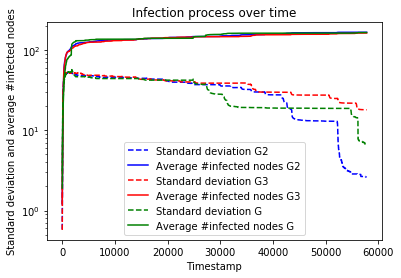

In [58]:
## G2
names_var_G2 = list(std_dict_G2.keys())
values_var_G2 = list(std_dict_G2.values())
names_average_G2 = list(average_dict_G2.keys())
values_average_G2 = list(average_dict_G2.values())

# Variables for std G2
y1 = values_var_G2 
x1 = range(len(std_dict_G2))

# Variables for average G2 
y2 = values_average_G2 
x2 = range(len(average_dict_G2))

## G3
names_var_G3 = list(std_dict_G3.keys())
values_var_G3 = list(std_dict_G3.values())
names_average_G3 = list(average_dict_G3.keys())
values_average_G3 = list(average_dict_G3.values())

# Variables for std G3
y3 = values_var_G3
x3 = range(len(std_dict_G3))

# Variables for average G3
y4 = values_average_G3
x4 = range(len(average_dict_G3))

## G
names_var = list(std_dict.keys())
values_var = list(std_dict.values())
names_average = list(average_dict.keys())
values_average = list(average_dict.values())

# Variables for std G
y5 = values_var 
x5 = range(len(std_dict))

# Variables for average G
y6 = values_average 
x6 = range(len(average_dict))



plt.plot(x1, y1, 'b--', label='Standard deviation G2')
plt.plot(x2, y2, 'blue', label='Average #infected nodes G2')

plt.plot(x3, y3, 'r--', label='Standard deviation G3')
plt.plot(x4, y4, 'red', label='Average #infected nodes G3')


plt.plot(x5, y5, 'g--', label='Standard deviation G')
plt.plot(x6, y6, 'green', label='Average #infected nodes G')

plt.yscale('log')
plt.ylabel('Standard deviation and average #infected nodes')
plt.xlabel('Timestamp')
plt.title('Infection process over time')
plt.legend()
plt.show()

## Information spreading performance G, G2 and G3

In [59]:
#iteration N=10
N=166

## Network G2

In [60]:
Time_80_G2=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G2_Temp[i])):
            if (len(infected) < 133):
                if (G2_Temp[i][j][0] in infected) | (G2_Temp[i][j][1] in infected):
                    infected.extend(list(G2_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    Time_80_G2.append([time,seed])

In [61]:
Time_80_G2_ranked=sorted(Time_80_G2)
Time_80_G2_ranked

[[1543, 3],
 [1543, 18],
 [1543, 19],
 [1543, 50],
 [1543, 57],
 [1543, 69],
 [1543, 84],
 [1543, 86],
 [1543, 94],
 [1570, 1],
 [1570, 2],
 [1570, 4],
 [1570, 5],
 [1570, 7],
 [1570, 8],
 [1570, 9],
 [1570, 10],
 [1570, 11],
 [1570, 12],
 [1570, 13],
 [1570, 14],
 [1570, 15],
 [1570, 17],
 [1570, 20],
 [1570, 21],
 [1570, 23],
 [1570, 25],
 [1570, 26],
 [1570, 27],
 [1570, 29],
 [1570, 33],
 [1570, 35],
 [1570, 39],
 [1570, 40],
 [1570, 41],
 [1570, 42],
 [1570, 43],
 [1570, 44],
 [1570, 45],
 [1570, 47],
 [1570, 48],
 [1570, 51],
 [1570, 53],
 [1570, 54],
 [1570, 55],
 [1570, 56],
 [1570, 58],
 [1570, 59],
 [1570, 60],
 [1570, 62],
 [1570, 63],
 [1570, 64],
 [1570, 65],
 [1570, 66],
 [1570, 67],
 [1570, 68],
 [1570, 70],
 [1570, 72],
 [1570, 74],
 [1570, 75],
 [1570, 76],
 [1570, 77],
 [1570, 79],
 [1570, 81],
 [1570, 85],
 [1570, 87],
 [1570, 88],
 [1570, 89],
 [1570, 90],
 [1570, 96],
 [1570, 100],
 [1570, 101],
 [1570, 102],
 [1570, 105],
 [1570, 106],
 [1570, 112],
 [1570, 115],


In [62]:
R2=np.zeros(N)
print()
for i in range(N):
    R2[i]=Time_80_G2_ranked[i][1]
R2

array([  3.,  18.,  19.,  50.,  57.,  69.,  84.,  86.,  94.,   1.,   2.,
         4.,   5.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        17.,  20.,  21.,  23.,  25.,  26.,  27.,  29.,  33.,  35.,  39.,
        40.,  41.,  42.,  43.,  44.,  45.,  47.,  48.,  51.,  53.,  54.,
        55.,  56.,  58.,  59.,  60.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  70.,  72.,  74.,  75.,  76.,  77.,  79.,  81.,  85.,  87.,
        88.,  89.,  90.,  96., 100., 101., 102., 105., 106., 112., 115.,
       117., 121., 139., 152.,   6.,  22.,  28.,  30.,  31.,  32.,  37.,
        38.,  52.,  61.,  71.,  73.,  80.,  82.,  83.,  92.,  93.,  95.,
       104., 109., 124., 145., 103., 107., 123., 134.,  16.,  24.,  34.,
        36.,  49.,  98.,  99., 108., 113., 118., 119., 138., 143., 148.,
       150., 151.,  46.,  91., 130., 111., 116., 114., 141., 128., 110.,
       144., 129., 164., 142., 122., 140., 133., 149.,  78., 127.,  97.,
       120., 136., 132., 126., 146., 153., 125., 16

## Network G3

In [63]:
Time_80_G3=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G3_Temp[i])):
            if (len(infected) < 133):
                if (G3_Temp[i][j][0] in infected) | (G3_Temp[i][j][1] in infected):
                    infected.extend(list(G3_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    if time != 0: 
        Time_80_G3.append([time,seed])

In [64]:
Time_80_G3_ranked=sorted(Time_80_G3)
Time_80_G3_ranked

[[1720, 1],
 [1720, 4],
 [1720, 13],
 [1720, 14],
 [1720, 26],
 [1720, 27],
 [1720, 32],
 [1720, 42],
 [1720, 43],
 [1720, 56],
 [1720, 57],
 [1720, 58],
 [1720, 65],
 [1720, 70],
 [1720, 79],
 [1720, 80],
 [1720, 81],
 [1720, 83],
 [1720, 84],
 [1720, 86],
 [1720, 113],
 [1726, 3],
 [1726, 6],
 [1726, 8],
 [1726, 9],
 [1726, 15],
 [1726, 20],
 [1726, 29],
 [1726, 30],
 [1726, 31],
 [1726, 36],
 [1726, 37],
 [1726, 38],
 [1726, 39],
 [1726, 66],
 [1726, 67],
 [1726, 68],
 [1726, 77],
 [1726, 87],
 [1726, 106],
 [1726, 115],
 [1726, 118],
 [1726, 121],
 [1726, 122],
 [1726, 123],
 [2006, 2],
 [2006, 5],
 [2006, 7],
 [2006, 11],
 [2006, 12],
 [2006, 16],
 [2006, 17],
 [2006, 18],
 [2006, 21],
 [2006, 22],
 [2006, 23],
 [2006, 24],
 [2006, 25],
 [2006, 33],
 [2006, 34],
 [2006, 35],
 [2006, 40],
 [2006, 44],
 [2006, 45],
 [2006, 47],
 [2006, 48],
 [2006, 50],
 [2006, 51],
 [2006, 53],
 [2006, 54],
 [2006, 59],
 [2006, 61],
 [2006, 63],
 [2006, 64],
 [2006, 69],
 [2006, 71],
 [2006, 72],
 

In [65]:
R3=np.zeros(N)
print()
for i in range(len(Time_80_G3_ranked)):
    R3[i]=Time_80_G3_ranked[i][1]
R3

array([  1.,   4.,  13.,  14.,  26.,  27.,  32.,  42.,  43.,  56.,  57.,
        58.,  65.,  70.,  79.,  80.,  81.,  83.,  84.,  86., 113.,   3.,
         6.,   8.,   9.,  15.,  20.,  29.,  30.,  31.,  36.,  37.,  38.,
        39.,  66.,  67.,  68.,  77.,  87., 106., 115., 118., 121., 122.,
       123.,   2.,   5.,   7.,  11.,  12.,  16.,  17.,  18.,  21.,  22.,
        23.,  24.,  25.,  33.,  34.,  35.,  40.,  44.,  45.,  47.,  48.,
        50.,  51.,  53.,  54.,  59.,  61.,  63.,  64.,  69.,  71.,  72.,
        74.,  75.,  76.,  82.,  85.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  98., 104., 107., 109., 112., 116., 119., 145.,
        10.,  19.,  46.,  55.,  73.,  99., 110., 117., 124., 133., 142.,
       151.,  28.,  41.,  49.,  52.,  62.,  78., 149., 153., 143., 101.,
       103., 105., 127., 108., 140., 146., 150.,  60., 102., 144., 100.,
       128., 138., 148., 130., 111., 120., 114., 139., 141., 152., 134.,
       126., 129.,  97., 131., 135., 136., 162., 13

## Network G

In [66]:
Time_80=[]
for seed in range(1,N+1):
    infected=[]
    time=0
    infected.append(seed)
    for i in range(1,keymax):
        flag=0
        for j in range(len(G_Temp[i])):
            if (len(infected) < 133):
                if (G_Temp[i][j][0] in infected) | (G_Temp[i][j][1] in infected):
                    infected.extend(list(G_Temp[i][j]))
                infected=list(set(infected))
            else:
                time = i
                flag = 1
                break
        if flag==1:
            break
    Time_80.append([time,seed])

In [67]:
Time_80_ranked=sorted(Time_80)
Time_80_ranked

[[1720, 1],
 [1720, 2],
 [1720, 3],
 [1720, 4],
 [1720, 5],
 [1720, 6],
 [1720, 7],
 [1720, 8],
 [1720, 9],
 [1720, 10],
 [1720, 11],
 [1720, 12],
 [1720, 13],
 [1720, 14],
 [1720, 15],
 [1720, 16],
 [1720, 17],
 [1720, 18],
 [1720, 19],
 [1720, 20],
 [1720, 21],
 [1720, 22],
 [1720, 23],
 [1720, 24],
 [1720, 25],
 [1720, 26],
 [1720, 27],
 [1720, 28],
 [1720, 29],
 [1720, 30],
 [1720, 31],
 [1720, 32],
 [1720, 33],
 [1720, 34],
 [1720, 35],
 [1720, 36],
 [1720, 37],
 [1720, 38],
 [1720, 39],
 [1720, 40],
 [1720, 41],
 [1720, 42],
 [1720, 43],
 [1720, 44],
 [1720, 45],
 [1720, 46],
 [1720, 47],
 [1720, 48],
 [1720, 49],
 [1720, 50],
 [1720, 51],
 [1720, 52],
 [1720, 53],
 [1720, 54],
 [1720, 55],
 [1720, 56],
 [1720, 57],
 [1720, 58],
 [1720, 59],
 [1720, 60],
 [1720, 61],
 [1720, 62],
 [1720, 63],
 [1720, 64],
 [1720, 65],
 [1720, 66],
 [1720, 67],
 [1720, 68],
 [1720, 69],
 [1720, 70],
 [1720, 71],
 [1720, 72],
 [1720, 73],
 [1720, 74],
 [1720, 75],
 [1720, 76],
 [1720, 77],
 [1720, 

In [68]:
R=np.zeros(N)
print()
for i in range(N):
    R[i]=Time_80_ranked[i][1]
R

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 114., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

## Compare G, G2 and G3

In [69]:
Ranked_Nodes_df = pd.DataFrame()

In [70]:
Ranked_Nodes_df['G']= R
Ranked_Nodes_df['G2']= R2
Ranked_Nodes_df['G3']= R3

In [71]:
# top ten most influencial nodes in three networks
Ranked_Nodes_df[:10]

G    G2    G3
0   1.0   3.0   1.0
1   2.0  18.0   4.0
2   3.0  19.0  13.0
3   4.0  50.0  14.0
4   5.0  57.0  26.0
5   6.0  69.0  27.0
6   7.0  84.0  32.0
7   8.0  86.0  42.0
8   9.0  94.0  43.0
9  10.0   1.0  56.0

In [72]:
#Compare G and G2
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrr2f = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    R2f = R2[:numNodes]
    InterRR2 = np.intersect1d(Rf, R2f)
    Rrr2f_i = len(InterRR2)/len(Rf)
    Rrr2f.append(Rrr2f_i)
    
print(Rrr2f)

[0.125, 0.5, 0.76, 0.7575757575757576, 0.7073170731707317, 0.72, 0.7413793103448276, 0.7575757575757576, 0.76, 0.7590361445783133]


In [73]:
#Compare G and G3
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rrr3f = []
for i in f:
    numNodes = int(i*167)
    Rf = R[:numNodes]
    R3f = R3[:numNodes]
    InterRR3 = np.intersect1d(Rf, R3f)
    Rrr3f_i = len(InterRR3)/len(Rf)
    Rrr3f.append(Rrr3f_i)
    
print(Rrr3f)

[0.25, 0.25, 0.32, 0.48484848484848486, 0.4878048780487805, 0.54, 0.6551724137931034, 0.7272727272727273, 0.8, 0.8554216867469879]


In [74]:
#Compare G2 and G3
f = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.5]
Rr23f = []
for i in f:
    numNodes = int(i*167)
    R2f = R2[:numNodes]
    R3f = R3[:numNodes]
    InterR23 = np.intersect1d(R2f, R3f)
    Rr23f_i = len(InterR23)/len(R2f)
    Rr23f.append(Rr23f_i)
    
print(Rr23f)


[0.0, 0.1875, 0.4, 0.45454545454545453, 0.43902439024390244, 0.5, 0.603448275862069, 0.696969696969697, 0.7333333333333333, 0.7831325301204819]


In [78]:
Rr23f_i

0.7831325301204819

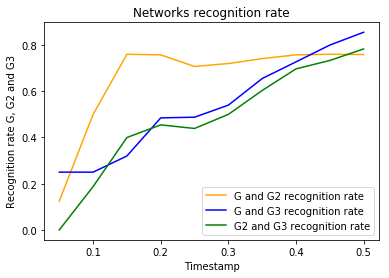

In [75]:
# G and G2 recognition rate
y1 = Rrr2f
x1 = f

# G and G3 recognition rate
y2 = Rrr3f 
x2 = f

# G2 and G3 recognition rate
y3 = Rr23f 
x3 = f

plt.plot(x1, y1, 'orange', label='G and G2 recognition rate')
plt.plot(x2, y2, 'blue', label='G and G3 recognition rate')
plt.plot(x3, y3, 'green', label='G2 and G3 recognition rate')

plt.ylabel('Recognition rate G, G2 and G3')
plt.xlabel('Timestamp')
plt.title('Networks recognition rate')
plt.legend()
plt.show()